## Logistic Regression based model for MNIST (500 image samples only)

In [391]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Step 1: Fetch data

In [342]:
from sklearn.datasets import fetch_mldata

In [343]:
mnist = fetch_mldata('MNIST original')

/home/santhosh/projects/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/home/santhosh/projects/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


Check if the data is downloaded properly.

In [344]:
mnist.data.shape, mnist.target.shape

((70000, 784), (70000,))

Let us try to split the data in to 400 for training and 100 for testing manually. (requirement from problem statement).

In [392]:
x_train_400 = mnist.data[:400]
x_test_400 = mnist.data[400:500]
y_train_400 = mnist.target[:400]
y_test_400 = mnist.target[400:500]
x_train_400.shape, x_test_400.shape, y_train_400.shape, y_test_400.shape

((400, 784), (100, 784), (400,), (100,))

Let us see how our data split looks like.

In [346]:
import matplotlib.pyplot as plt
import numpy as np

Just a convenience function to plot the histogram. 

In [347]:
def plot_hist(val,ylim=500):
    plt.hist(val,facecolor='g', alpha=0.7)
    plt.axis([0, 9, 0, ylim])
    plt.xlabel('Digits(0-9)')
    plt.ylabel('Number of images')
    plt.show()
    return

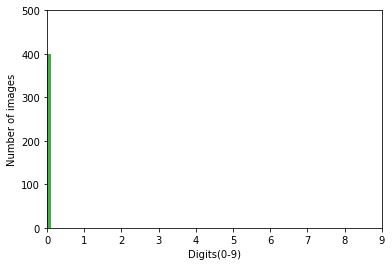

In [348]:
plot_hist(y_train_400)

Oh shoot! we wanted our data set to cover a range between **0 to 9**. But our logic to split the data set is flawed. i.e. looks like we only have images of **'0'**. If we build a model with above data set, it fails to classify the digits properly. So, our immideate next step is to get the evenly distributed samples of data.

### Step 2: Get evenly distributed data samples

There are many ways you can do it. But I'm choosing the **pandas** to do the data splitting job for me. Let us see how we can do that.

In [349]:
import pandas as pd

In [350]:
x_train_df = pd.DataFrame(mnist.data)
y_train_df = pd.DataFrame(mnist.target)
#y_train_df.head(5)
#x_train_df.head(5)
x_train_df.shape, y_train_df.shape

((70000, 784), (70000, 1))

In [351]:
dataset=pd.concat([x_train_df,y_train_df],axis=1)
dataset.shape

(70000, 785)

Now let us select some samples to get the evenly distributed data which we are interested in.

In [352]:
dataset_500=dataset.sample(500,axis=0,random_state=1)
dataset_500.shape

(500, 785)

In [353]:
labels=dataset_500.iloc[:,-1]
dataset_500 = dataset_500.iloc[:, :-1]
dataset_500.shape,labels.shape

((500, 784), (500,))

In [354]:
labels.value_counts()

2.0    59
7.0    54
1.0    54
4.0    52
0.0    51
8.0    51
6.0    49
9.0    47
3.0    42
5.0    41
Name: 0, dtype: int64

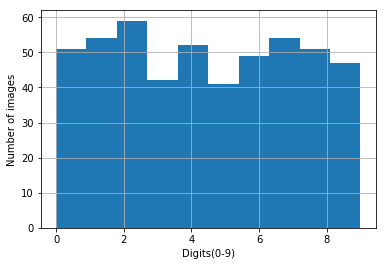

In [355]:
labels.hist()
plt.xlabel('Digits(0-9)')
plt.ylabel('Number of images')
plt.show()

Our data distribution looks good. Now we can split our data in to training and testing test. Let us do it by using the sklearn **train_test_split** utility.

In [356]:
from sklearn.model_selection import train_test_split
train_img_df, test_img_df, train_lbl_df, test_lbl_df = train_test_split(
 dataset_500, labels, test_size=0.2, random_state=1)
train_img_df.shape,test_img_df.shape,train_lbl_df.shape, test_lbl_df.shape

((400, 784), (100, 784), (400,), (100,))

In [357]:
type(train_img_df)

pandas.core.frame.DataFrame

Since we took panda's help in getting our data distribution issue sorted. We still have the data in panda's dataframe format.But we need the data in numpy array format. Let us convert the dataframe in to np.array().

In [393]:
train_img = np.array(train_img_df.values.tolist())
test_img = np.array(test_img_df.values.tolist())
train_lbl = np.array(train_lbl_df.values.tolist())
test_lbl = np.array(test_lbl_df.values.tolist())

## Train-data image distribution

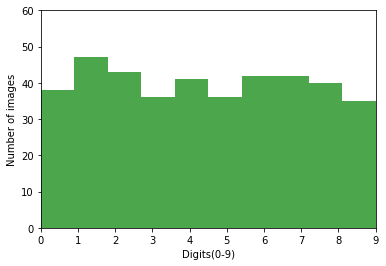

In [394]:
plot_hist(train_lbl,ylim=60)

### Test-data image distribution

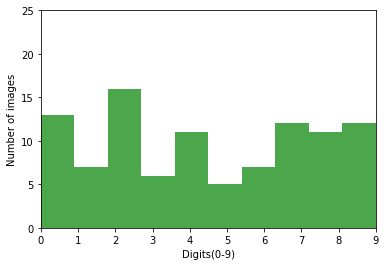

In [360]:
plot_hist(test_lbl,ylim=25)

If the distribution dosn't look good, just re-run the cells where we did  **dataset.sample(500,axis=0,random_state=1)** with **random_state=0** couple of times to get the image distribution as shown above. 

### Step 3: Visualize images


In [361]:
import numpy as np

In [362]:
def visualize(ims, figsize=(8,8), rows=2, titles=None):
    f = plt.figure(figsize=figsize)
    cols = len(ims)/rows
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], cmap='gray')

In [363]:
x_imgs = np.reshape(train_img, (-1,28,28)); x_imgs.shape

(400, 28, 28)

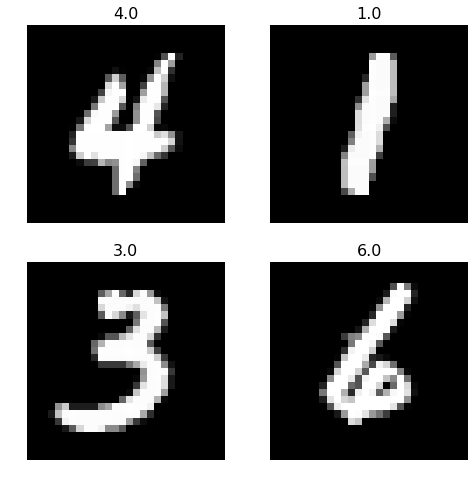

In [364]:
visualize(x_imgs[20:24],titles=train_lbl[20:24])

# Logistic Regression

In [365]:
from sklearn.linear_model import LogisticRegression

For now just run with the default values of the Logistic regressor.

**TODO:** play around with the parameters to get better accuracy.

In [366]:
logisticRegr = LogisticRegression()

In [367]:
logisticRegr.fit(train_img, train_lbl)

/home/santhosh/projects/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/santhosh/projects/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Let us predict and see how well our model is doing.

pridict on single image.

In [368]:
logisticRegr.predict(test_img[0].reshape(1,-1))

array([0.])

In [369]:
test_lbl[0]

0.0

Predict on multiple images

In [388]:
predict_lables = logisticRegr.predict(test_img[10:20])
predict_lables,test_lbl[10:20]

(array([1., 6., 6., 2., 7., 4., 7., 9., 9., 4.]),
 array([1., 6., 6., 2., 7., 4., 9., 9., 9., 4.]))

Looks like there are some images which were misclassified. Let us try to visualize them to get better clarity.

In [371]:
predict_img = np.reshape(test_img, (-1,28,28)); predict_img.shape

(100, 28, 28)

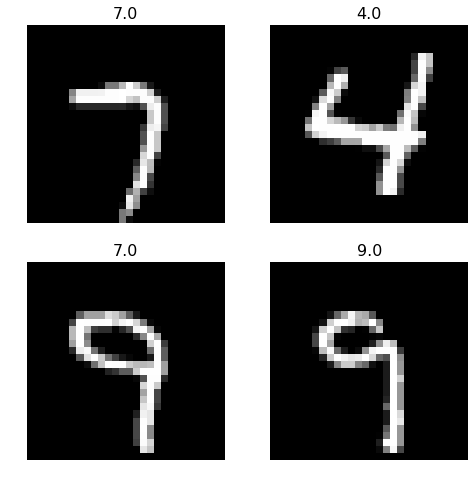

In [389]:
visualize(predict_img[14:18],titles=predict_lables[4:8])

Okay, it is clear from the above visualization that **9 is being misclassified as 7**. Let us see what is the accuracy of our model.

In [390]:
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.81


Looks like our model is only **81% accuracate**. That means we need to fine tune some parameters to achive better accracy. 

Also, let us see how our model is performing using a metric called confusion matrix.

In [374]:
predictions = logisticRegr.predict(test_img)

### Performance measure using confusion matrix

In [375]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [382]:
cm = metrics.confusion_matrix(test_lbl, predictions)
#print(cm)

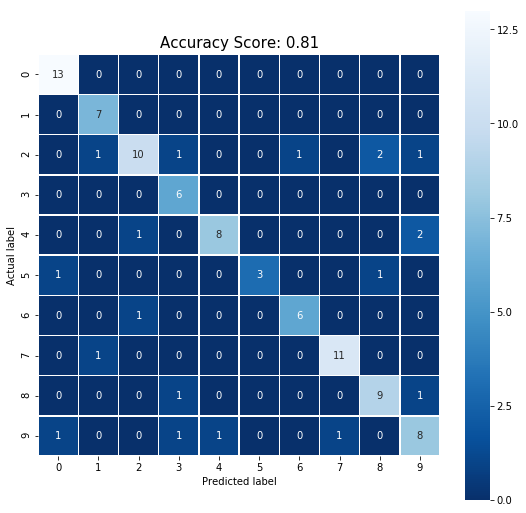

In [383]:
plt.figure(figsize=(9,9))
#sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### Save the Model

Once we are happy with our model, we can save it in pickle format and re-load it in our deployment model.

In [384]:
import pickle

In [387]:
filename = 'logistic_regression_model_default.pkl'
pickle.dump(logisticRegr, open(filename, 'wb'))